# Study Case Credit Score

# Astra Data Scientist Bootcamp

#### The project is presented by Zumarsiyah Mahsyari

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load & Read Data

In [2]:
df = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Study-Case-Astra-Creditscore-master/Study-Case-Astra-Creditscore-master/training.csv")
df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [3]:
#dimension
df.shape

(16625, 16)

Data terdiri dari 16 kolom dan 16625 baris

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


Tipe data tiap kolom adalah numerik.

# Data Preparation

In [5]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

Tidak ada missing value pada data.

In [6]:
df = df.set_index("ID")
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
ID,,,,,,,,,,,,,,,
1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


Untuk memudahkan analisis selanjutnya, 'ID' diatur sebagai indeks kolom.

# EXPLORATORY DATA ANALYSIS

In [7]:
df.columns

Index(['LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'SEX', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'TARGET'],
      dtype='object')

In [8]:
numerik = df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3']]
numerik.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,43.373955,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368
std,124931.062684,8.777974,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915
min,0.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000
25%,50000.000000,37.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000
50%,120000.000000,42.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000
75%,230000.000000,49.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000
max,800000.000000,72.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000


In [9]:
kategori = df[['MARRIAGE', 'EDUCATION', 'SEX', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'TARGET']]
kategori = kategori.astype('category')
kategori.describe()

,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,TARGET
count,16625,16625,16625,16625,16625,16625,16625,16625
unique,3,4,2,52,5,5,5,2
top,1,2,2,38,0,0,0,0
freq,8901,6925,9788,924,11715,13287,13534,9989


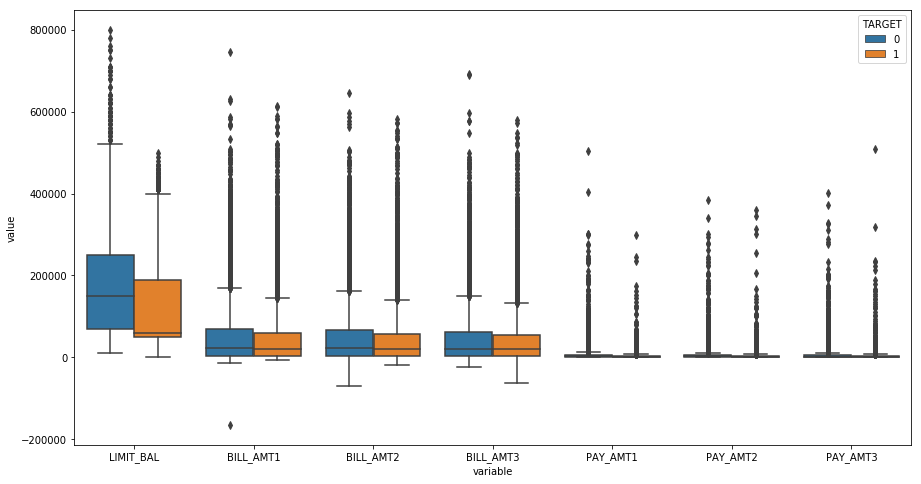

In [10]:
dff=pd.melt(df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'TARGET']],id_vars='TARGET')
sns.boxplot(y="value", x="variable", hue='TARGET', data=dff)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan visualisasi di atas, terdapat outlier pada batas maksimal kredit, jumlah tagihan per bulannya, dan jumlah pembayaran per bulannya. Jumlah tagihan per bulannya kurang lebih memiliki karakteristik yang sama. Hal yang sama juga terjadi pada jumlah pembayaran, karakteristik cenderung sama tiap bulannya. Sedangkan batas maksimal kredit memiliki perbedaan karakteristik antara yang beresiko terlambat bayar dan tidak pada bulan berikutnya.

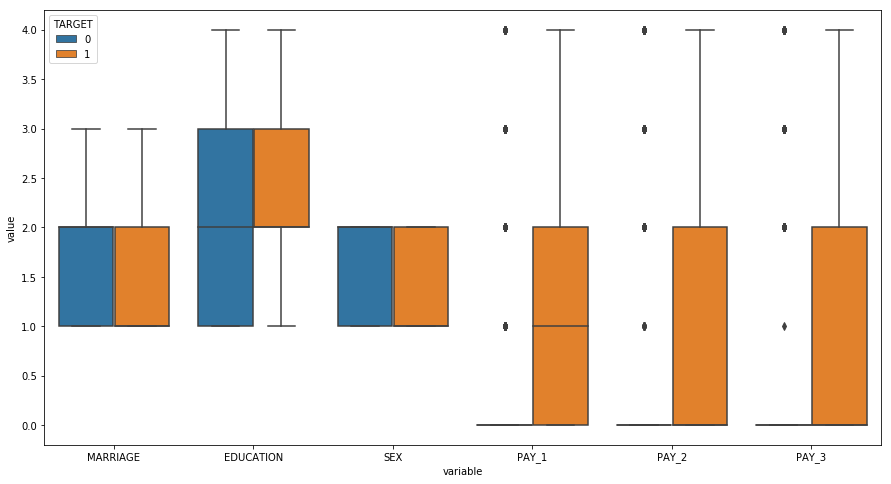

In [11]:
dff2=pd.melt(df[['MARRIAGE', 'EDUCATION', 'SEX', 'PAY_1','PAY_2', 'PAY_3', 'TARGET']],id_vars='TARGET')
sns.boxplot(y="value", x="variable", hue='TARGET', data=dff2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwa karakteristik status pernikahan dengan status pembayaran selanjutnya (terlambat atau tidak) memiliki karakteristik yang sama. Hal ini juga terjadi pada jenis kelamin dengan status pembayaran selanjutnya. Sedangkan untuk pendidikan terakhr, terdapat perbedaan karakteristik atara status pembayaran selanjutnya (terlambat atau tidak). Selain itu, status pembayaran yang tidak terlambat sebelumnya, status pembayaran selanjutnya cenderung tidak terlambat juga. Sedangkan custome yang status pembayarannya terlambat cenderung terlambat juga pada pembayaran selanjutnya.

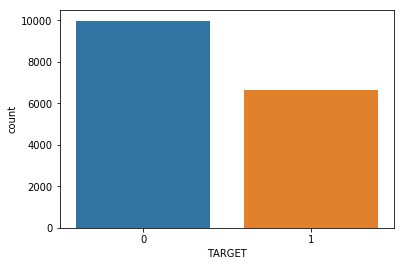

In [36]:
sns.countplot(x = kategori.TARGET)

Label data diketahui imbalance.

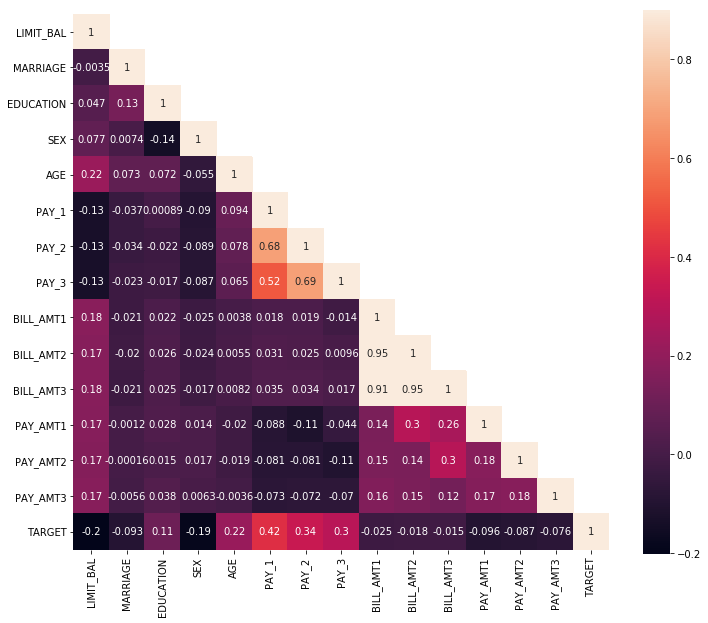

In [37]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,15))
fig.set_size_inches(12, 10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Berdasarkan visualisasi di atas, jumlah tagihan bulan tertentu menentukan jumlah tagihan bulan selanjutnya.
Begitu pun pada jumlah pembayaran, jumlah pembayaran pada bulan tertentu, menentukan jumlah pembayaran bulan selanjutnya.
Hal ini dikarenakan adanya korelasi yang cukup tinggi antara keduanya.

# FEATURE ENGINEERING

Transformasi dilakukan karena satuan data pada features berbeda-beda. Setelah dilakukan percobaan, transformasi dapat meningkatkan nilai akurasi walau tidak signifikan, yaitu sebesar 1%. Selain itu, transformasi juga dapat mempercepat proses klasifikasi.

In [12]:
transformation=StandardScaler().fit(df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3']])
df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
'PAY_AMT2', 'PAY_AMT3']]=transformation.transform(df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3']])

In [13]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
ID,,,,,,,,,,,,,,,
1,-1.021464,1,1,2,40,0,0,0,-0.355950,-0.344672,-0.331325,-0.231160,-0.226932,-0.226455,0
2,-1.101511,1,1,2,41,1,2,0,-0.459094,-0.457123,-0.429270,-0.344243,-0.247112,-0.212841,0
3,-1.101511,1,1,2,36,0,0,0,-0.455114,-0.427074,-0.418358,-0.239142,-0.242605,-0.233421,0
4,-1.101511,1,1,2,35,0,0,0,-0.664061,-0.648301,-0.632127,-0.272003,-0.267291,-0.308715,0
5,0.099187,1,1,2,38,0,0,0,1.645843,1.362243,0.934161,0.886372,0.607000,-0.068390,0


# CLASSIFICATION ALGORITHMS

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [15]:
cv=StratifiedKFold(n_splits=5,random_state=5)

In [16]:
x=df.drop('TARGET', axis=1)
y=df['TARGET']

In [17]:
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ( max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x, y,cv=cv)
    results.append(akurasi)
    names.append(name)
    hasil = "%s: %f" % (name, akurasi.mean())
    tabel.append(hasil)
tabel

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

['CART: 0.712582',
 'KNN: 0.710179',
 'Naive Bayes: 0.695624',
 'SVM: 0.707772',
 'Random Forest: 0.738202',
 'Bagging: 0.721364',
 'AdaBoost: 0.746924',
 'Gradient Boosting: 0.726168',
 'Logistic Regression: 0.685636',
 'MLP: 0.748432']

In [18]:
models

[('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('Random Forest',
  RandomForestClassifier(

Model terbaik didapatkan menggunakan algoritma MLP dengan akurasi 74,8a%. 

# Prediction

In [19]:
test = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Study-Case-Astra-Creditscore-master/Study-Case-Astra-Creditscore-master/testing.csv",
                 delimiter = ';', index_col='ID')
test.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
ID,,,,,,,,,,,,,,
1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [20]:
test.isnull().sum()

LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
dtype: int64

In [21]:
transformation=StandardScaler().fit(test[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3']])
test[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
'PAY_AMT2', 'PAY_AMT3']]=transformation.transform(test[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3']])

In [22]:
model=MLPClassifier()
cross_val_score(model, x, y,cv=cv).mean()

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: S

0.7448237890466325

Akurasi pada data testing tidak jauh berbeda dengan data training, yaitu sebesar 74,48%. Hal ini menunjukkan bahwa model yang dibuat sesuai.

In [28]:
model.fit(x,y)
y_predict=model.predict(test)

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
y_predict=pd.DataFrame(y_predict,columns =['target_prediction'],index=test.index)
y_predict.head()

,target_prediction
ID,
1,0
2,0
3,0
4,0
5,0


In [30]:
test['target_prediction'] = y_predict['target_prediction']
test.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,target_prediction
ID,,,,,,,,,,,,,,,
1,-1.021464,1,1,2,40,0,0,0,-0.344672,-0.331325,-0.294757,-0.226932,-0.226455,-0.225370,0
2,-1.101511,1,1,2,41,2,0,0,-0.457123,-0.429270,-0.386221,-0.247112,-0.212841,-0.260743,0
3,-1.101511,1,1,2,36,0,0,0,-0.427074,-0.418358,-0.380771,-0.242605,-0.233421,-0.269137,0
4,-1.101511,1,1,2,35,0,0,0,-0.648301,-0.632127,-0.675411,-0.267291,-0.308715,-0.322496,0
5,0.099187,1,1,2,38,0,0,0,1.362243,0.934161,1.086288,0.607000,-0.068390,-0.022726,0


In [31]:
test.to_csv("C:/Users/zumars064124/Documents/ADSB 2/Study-Case-Astra-Creditscore-master/Study-Case-Astra-Creditscore-master/Hasil Prediksi Credit Score.csv")